# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API keys
import json
config = json.load(open("../config.json"))

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": config["weather_api_key"],
    'units': 'imperial',
}

# Variables
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
record_set = 1

print("Beginning Data Retrieval\n-----------------------------")

for city in cities:
    params.update({
        'q': city,
    })
    response = requests.get(url, params).json()
    record += 1
    if record > 49:
        record = 1
        record_set += 1
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {record} of Set {record_set} | {city}")
    except KeyError:
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        print('City not found. Skipping...')
    
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | newport
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | busselton
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | dickinson
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | provideniya
City not found. Skipping...
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | gudibanda
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | broome
City not found. Skipping...
Processing Record 23 of Set 1 | sao desiderio
Processing Record 24 of Set 1 | avarua
Processing Record 25 

Processing Record 10 of Set 5 | kulhudhuffushi
Processing Record 11 of Set 5 | grand-lahou
Processing Record 12 of Set 5 | westport
Processing Record 13 of Set 5 | inta
Processing Record 14 of Set 5 | lagoa
Processing Record 15 of Set 5 | kupang
Processing Record 16 of Set 5 | langsa
City not found. Skipping...
Processing Record 18 of Set 5 | parang
City not found. Skipping...
Processing Record 20 of Set 5 | kenai
Processing Record 21 of Set 5 | nikolskoye
Processing Record 22 of Set 5 | awbari
Processing Record 23 of Set 5 | san rafael
City not found. Skipping...
Processing Record 25 of Set 5 | moroni
Processing Record 26 of Set 5 | poum
Processing Record 27 of Set 5 | ryotsu
Processing Record 28 of Set 5 | kirakira
Processing Record 29 of Set 5 | faanui
Processing Record 30 of Set 5 | zhob
Processing Record 31 of Set 5 | nhulunbuy
Processing Record 32 of Set 5 | webb city
Processing Record 33 of Set 5 | whangarei
Processing Record 34 of Set 5 | walvis bay
Processing Record 35 of Set 

City not found. Skipping...
Processing Record 22 of Set 9 | sioux lookout
Processing Record 23 of Set 9 | shenjiamen
City not found. Skipping...
Processing Record 25 of Set 9 | whyalla
Processing Record 26 of Set 9 | pokhara
Processing Record 27 of Set 9 | batemans bay
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of Set 9 | herat
Processing Record 31 of Set 9 | guaruja
Processing Record 32 of Set 9 | santo estevao
Processing Record 33 of Set 9 | ranau
Processing Record 34 of Set 9 | iracoubo
Processing Record 35 of Set 9 | abu zabad
City not found. Skipping...
Processing Record 37 of Set 9 | maunabo
Processing Record 38 of Set 9 | ribeira grande
Processing Record 39 of Set 9 | bestobe
Processing Record 40 of Set 9 | bayburt
Processing Record 41 of Set 9 | tabas
Processing Record 42 of Set 9 | tocopilla
Processing Record 43 of Set 9 | jalu
Processing Record 44 of Set 9 | micheweni
Processing Record 45 of Set 9 | cururupu
Processing Record 46 of Set 9 | ta

Processing Record 27 of Set 13 | saint-georges
Processing Record 28 of Set 13 | mathbaria
Processing Record 29 of Set 13 | ouadda
Processing Record 30 of Set 13 | la palma
Processing Record 31 of Set 13 | pizarro
Processing Record 32 of Set 13 | tulun
Processing Record 33 of Set 13 | road town
Processing Record 34 of Set 13 | jiquilisco
Processing Record 35 of Set 13 | san patricio
Processing Record 36 of Set 13 | bikin
Processing Record 37 of Set 13 | vardo
Processing Record 38 of Set 13 | pemberton
Processing Record 39 of Set 13 | lakhipur
Processing Record 40 of Set 13 | konongo
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Use CSV writer to write API output to an out_file
with open(output_data_file, 'w', newline='') as out_file:
    writer = csv.writer(out_file)
    writer.writerows(zip(cities, lat, lng, max_temp, humidity, cloudiness, wind_speed, country, date))

In [5]:
# Import data from the CSV out_file, add header names and change Date type to object to maintain UNIX timestamp string
csv_file = pd.read_csv(output_data_file, 
                       names='City Lat Lng Max_Temp Humidity Cloudiness Wind_Speed Country Date'.split(), 
                       dtype={"Date": object})
df = pd.DataFrame(csv_file)
# Drop np.nan values and reset index
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

City      Lat       Lng  Max_Temp  Humidity  Cloudiness  \
0         newport  51.5877   -2.9984     35.01      76.0        73.0   
1    punta arenas -53.1500  -70.9167     69.80      28.0         0.0   
2         rikitea -23.1203 -134.9692     77.63      72.0        90.0   
3       ilulissat  69.2167  -51.1000     19.40      49.0         0.0   
4       busselton -33.6500  115.3333     63.00      99.0        87.0   
..            ...      ...       ...       ...       ...         ...   
558         bikin  46.8161  134.2600    -17.63      87.0        59.0   
559         vardo  70.3705   31.1107     21.20      79.0        90.0   
560     pemberton  50.3164 -122.8027     32.00      86.0        90.0   
561      lakhipur  26.0299   90.3041     57.88      49.0         0.0   
562       konongo   6.6167   -1.2167     76.77      87.0        46.0   

     Wind_Speed Country        Date  
0         23.73      GB  1612739420  
1          6.91      CL  1612739622  
2         13.13      PF  1612739622  
3         24.16      GL  1612739485  
4          1.99      AU  1612739623  
..          ...     ...         ...  
558        3.15      RU  1612739898  
559       18.41      NO  1612739731  
560        2.30      CA  1612739898  
561        3.11      IN  1612739899  
562        3.91      GH  1612739899  

[563 rows x 9 columns]

In [6]:
# Change Date dtype from object to int
df['Date'] = df['Date'].astype(int)

# Create a new column Date with custom format
df['Date_Custom'] = df['Date'].apply(lambda x: time.strftime("%b %d, %Y | %I:%M:%S %p", time.gmtime(x)))

# Rename Date column
df.rename(columns={
    'Date': 'Date_UNIX',
}, inplace = True)

In [7]:
df.head()

City      Lat       Lng  Max_Temp  Humidity  Cloudiness  \
0       newport  51.5877   -2.9984     35.01      76.0        73.0   
1  punta arenas -53.1500  -70.9167     69.80      28.0         0.0   
2       rikitea -23.1203 -134.9692     77.63      72.0        90.0   
3     ilulissat  69.2167  -51.1000     19.40      49.0         0.0   
4     busselton -33.6500  115.3333     63.00      99.0        87.0   

   Wind_Speed Country   Date_UNIX                 Date_Custom  
0       23.73      GB  1612739420  Feb 07, 2021 | 11:10:20 PM  
1        6.91      CL  1612739622  Feb 07, 2021 | 11:13:42 PM  
2       13.13      PF  1612739622  Feb 07, 2021 | 11:13:42 PM  
3       24.16      GL  1612739485  Feb 07, 2021 | 11:11:25 PM  
4        1.99      AU  1612739623  Feb 07, 2021 | 11:13:43 PM

In [8]:
df.describe()

Lat         Lng    Max_Temp    Humidity  Cloudiness  Wind_Speed  \
count  563.000000  563.000000  563.000000  563.000000  563.000000  563.000000   
mean    18.494557   17.664143   50.281563   72.603908   52.110124    8.760053   
std     33.452003   92.244414   31.625835   19.307802   38.261815    6.168922   
min    -54.800000 -179.166700  -37.120000    6.000000    0.000000    0.130000   
25%     -8.844250  -63.363200   28.510000   64.000000   15.000000    3.935000   
50%     20.878300   24.662200   62.600000   77.000000   53.000000    7.850000   
75%     46.991350   96.249250   76.335000   87.000000   90.000000   12.135000   
max     78.218600  179.316700   87.800000  100.000000  100.000000   40.290000   

          Date_UNIX  
count  5.630000e+02  
mean   1.612740e+09  
std    1.185931e+02  
min    1.612739e+09  
25%    1.612740e+09  
50%    1.612740e+09  
75%    1.612740e+09  
max    1.612740e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Checking whether max is over 100%
df['Humidity'].max()

100.0

In [10]:
# Checking top 5 largest humidity datasets
df.nlargest(5, 'Humidity')

City      Lat       Lng  Max_Temp  Humidity  Cloudiness  \
57        vaini -21.2000 -175.2000     77.00     100.0        90.0   
72   hambantota   6.1241   81.1185     75.20     100.0         0.0   
151   carnarvon -24.8667  113.6333     77.00     100.0         8.0   
190      kupang -10.1667  123.5833     75.20     100.0        20.0   
228       airai  -8.9266  125.4092     63.54     100.0       100.0   

     Wind_Speed Country   Date_UNIX                 Date_Custom  
57        10.36      TO  1612739648  Feb 07, 2021 | 11:14:08 PM  
72         6.91      LK  1612739469  Feb 07, 2021 | 11:11:09 PM  
151        8.05      AU  1612739694  Feb 07, 2021 | 11:14:54 PM  
190        2.30      ID  1612739432  Feb 07, 2021 | 11:10:32 PM  
228        2.28      TL  1612739734  Feb 07, 2021 | 11:15:34 PM

In [11]:
print('There are no cities with Humidity higher than 100%')

There are no cities with Humidity higher than 100%


In [12]:
df.describe()

Lat         Lng    Max_Temp    Humidity  Cloudiness  Wind_Speed  \
count  563.000000  563.000000  563.000000  563.000000  563.000000  563.000000   
mean    18.494557   17.664143   50.281563   72.603908   52.110124    8.760053   
std     33.452003   92.244414   31.625835   19.307802   38.261815    6.168922   
min    -54.800000 -179.166700  -37.120000    6.000000    0.000000    0.130000   
25%     -8.844250  -63.363200   28.510000   64.000000   15.000000    3.935000   
50%     20.878300   24.662200   62.600000   77.000000   53.000000    7.850000   
75%     46.991350   96.249250   76.335000   87.000000   90.000000   12.135000   
max     78.218600  179.316700   87.800000  100.000000  100.000000   40.290000   

          Date_UNIX  
count  5.630000e+02  
mean   1.612740e+09  
std    1.185931e+02  
min    1.612739e+09  
25%    1.612740e+09  
50%    1.612740e+09  
75%    1.612740e+09  
max    1.612740e+09

### Below two steps are not applicable - there are no cities with humidity over 100%

In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

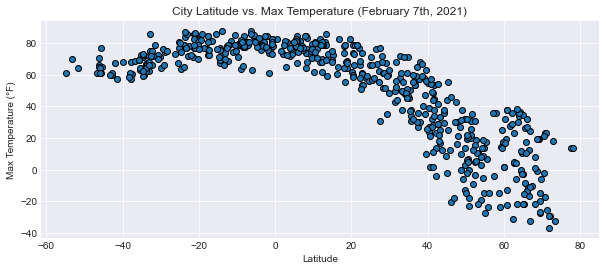

In [15]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 4))

x_axis = df['Lat']
y_axis = df['Max_Temp']

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.title('City Latitude vs. Max Temperature (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.savefig("output_data/Latitude_vs_MaxTemperature_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Maximum Temperature (°F) (y axis).

As can be seen, at higher altitudes the lower the temperature, especially after moving out of the Tropics range which is roughly at +/-23 latitude.

## Latitude vs. Humidity Plot

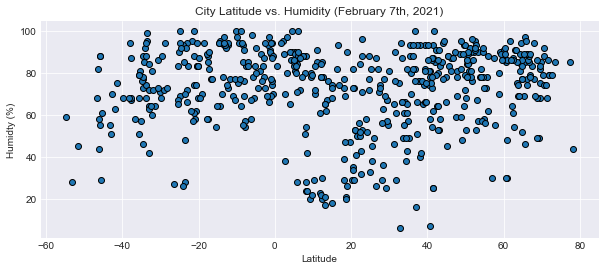

In [16]:
plt.figure(figsize=(10, 4))

x_axis = df['Lat']
y_axis = df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.title('City Latitude vs. Humidity (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.savefig("output_data/Latitude_vs_Humidity_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Humidity (%) (y axis).

There appears to be no relation whatsoever between latitudes and humidity across cities; although, most cities range above 60% humidity.

## Latitude vs. Cloudiness Plot

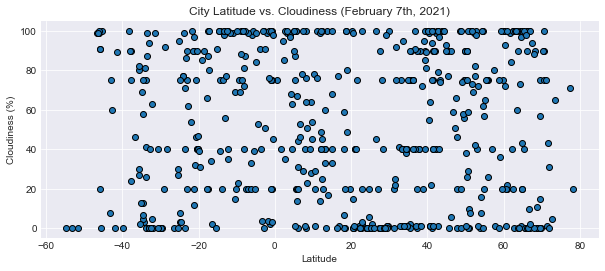

In [17]:
plt.figure(figsize=(10, 4))

x_axis = df['Lat']
y_axis = df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Latitude_vs_Cloudiness_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Cloudiness (%) (y axis).

There appears to be no relation whatsoever between latitudes and cloudiness across cities.

## Latitude vs. Wind Speed Plot

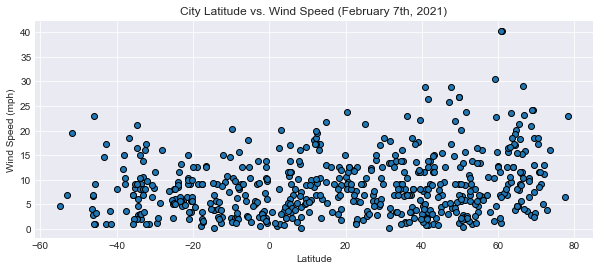

In [18]:
plt.figure(figsize=(10, 4))

x_axis = df['Lat']
y_axis = df['Wind_Speed']

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Latitude_vs_WindSpeed_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Wind Speed (mph) (y axis).

There appears to be no relation whatsoever between latitudes and wind speed across cities; however, it can be stated that most wind speeds are concentrated below 10 miles per hour across cities; regardless of the latitude.

## Linear Regression

In [19]:
# Northern Hemisphere DataFrame
northern_df = df[(df['Lat'] >= 0)]
northern_df.head()

City      Lat      Lng  Max_Temp  Humidity  Cloudiness  Wind_Speed  \
0    newport  51.5877  -2.9984     35.01      76.0        73.0       23.73   
3  ilulissat  69.2167 -51.1000     19.40      49.0         0.0       24.16   
6  dickinson  29.4608 -95.0513     60.01      67.0         1.0       12.66   
7       hami  42.8000  93.4500     29.01      80.0        79.0        1.10   
8     bethel  41.3712 -73.4140     28.40      86.0        40.0        3.44   

  Country   Date_UNIX                 Date_Custom  
0      GB  1612739420  Feb 07, 2021 | 11:10:20 PM  
3      GL  1612739485  Feb 07, 2021 | 11:11:25 PM  
6      US  1612739625  Feb 07, 2021 | 11:13:45 PM  
7      CN  1612739625  Feb 07, 2021 | 11:13:45 PM  
8      US  1612739556  Feb 07, 2021 | 11:12:36 PM

In [20]:
# Southern Hemisphere DataFrame
southern_df = df[(df['Lat'] < 0)]
southern_df.head()

City      Lat       Lng  Max_Temp  Humidity  Cloudiness  \
1    punta arenas -53.1500  -70.9167     69.80      28.0         0.0   
2         rikitea -23.1203 -134.9692     77.63      72.0        90.0   
4       busselton -33.6500  115.3333     63.00      99.0        87.0   
5     new norfolk -42.7826  147.0587     60.01      70.0        60.0   
16  sao desiderio -12.3633  -44.9733     68.70      93.0       100.0   

    Wind_Speed Country   Date_UNIX                 Date_Custom  
1         6.91      CL  1612739622  Feb 07, 2021 | 11:13:42 PM  
2        13.13      PF  1612739622  Feb 07, 2021 | 11:13:42 PM  
4         1.99      AU  1612739623  Feb 07, 2021 | 11:13:43 PM  
5         1.01      AU  1612739624  Feb 07, 2021 | 11:13:44 PM  
16        2.51      BR  1612739630  Feb 07, 2021 | 11:13:50 PM

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

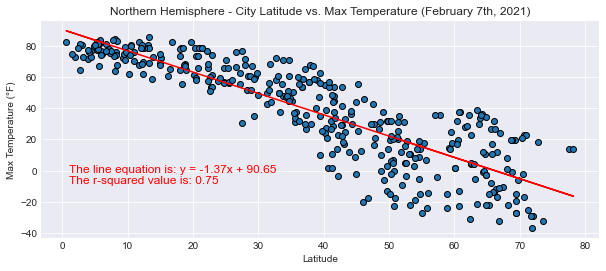

In [21]:
x_values = northern_df['Lat']
y_values = northern_df['Max_Temp']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Northern Hemisphere - City Latitude vs. Max Temperature (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.05,0.3), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.05,0.25), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/NH_Latitude_vs_MaxTemperature_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Maximum Temperature (°F) (y axis) of the Northern Hemisphere.

There is a strong inverse correlation between altitude and maximum temperature. At higher altitudes, the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

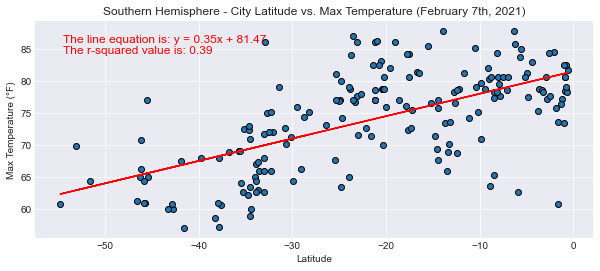

In [22]:
x_values = southern_df['Lat']
y_values = southern_df['Max_Temp']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Southern Hemisphere - City Latitude vs. Max Temperature (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.05,0.9), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.05,0.85), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/SH_Latitude_vs_MaxTemperature_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Maximum Temperature (°F) (y axis) of the Southern Hemisphere.

Although not a strong correlation, we can infer that temperature decreases as latitude decreases - this makes sense considering temperature decreases as we move down from the Tropic of Capricorn.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

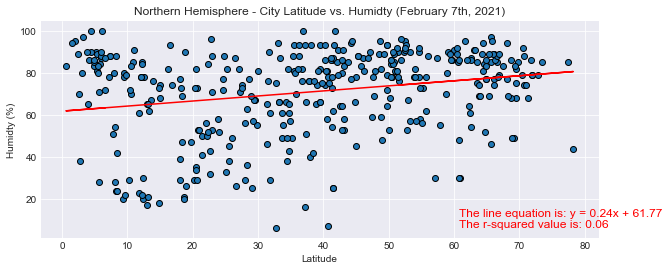

In [23]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Northern Hemisphere - City Latitude vs. Humidty (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.75,0.1), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.75,0.05), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/NH_Latitude_vs_Humidity_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Humidity (%) (y axis) of the Northern Hemisphere.

Based on above scatter plot and low r-squared value, we can infer that there is no strong correlation between latitude and humidity; however, as we move closer to the north pole it appears most of humidity in the cities range above 60%.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

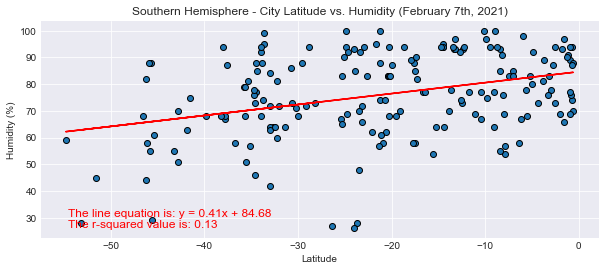

In [24]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Southern Hemisphere - City Latitude vs. Humidity (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.05,0.1), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.05,0.05), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/SH_Latitude_vs_Humidity_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Humidity (%) (y axis) of the Southern Hemisphere.

Based on above scatter plot and low r-squared value, we can infer that there is no correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

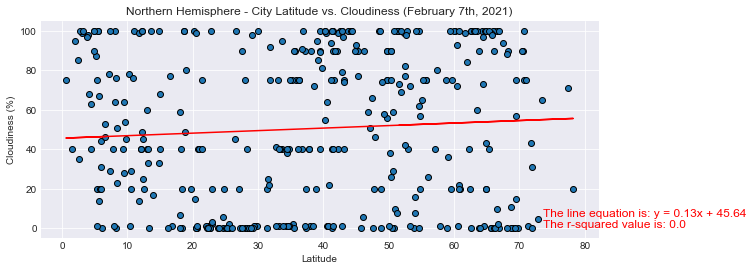

In [25]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.9,0.1), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.9,0.05), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/NH_Latitude_vs_Cloudiness_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Cloudiness (%) (y axis) of the Northern Hemisphere.

Based on above scatter plot and low r-squared value, we can infer that there is no correlation between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

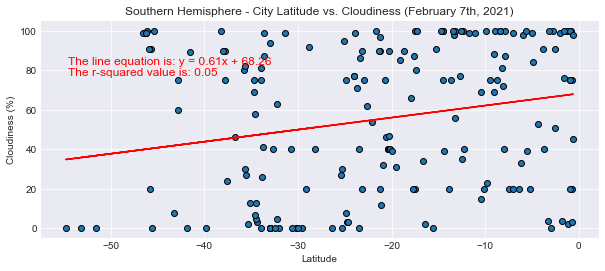

In [26]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.05,0.8), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.05,0.75), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/SH_Latitude_vs_Cloudiness_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Cloudiness (%) (y axis) of the Southern Hemisphere.

Based on above scatter plot and low r-squared value, we can infer that there is no correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

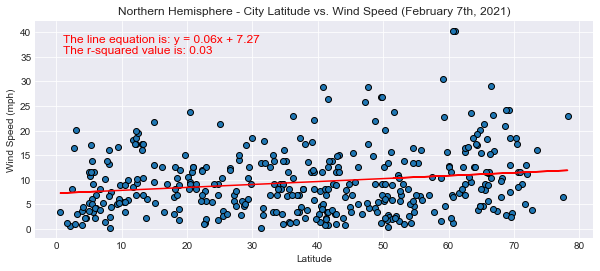

In [27]:
x_values = northern_df['Lat']
y_values = northern_df['Wind_Speed']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.05,0.9), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.05,0.85), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/NH_Latitude_vs_WindSpeed_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Wind Speed (mph) (y axis) of the Northern Hemisphere.

Based on above scatter plot and low r-squared value, we can infer that there is no correlation between latitude and wind speeds; however, we can state that most wind speeds are concentrated below 10 miles per hour across cities; regardless of the latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

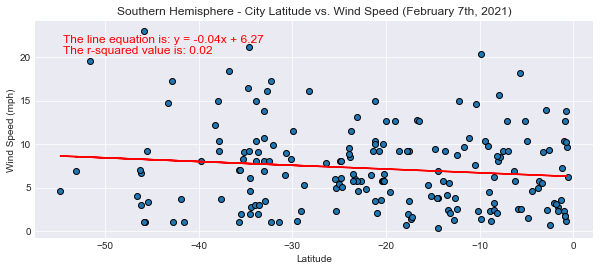

In [28]:
x_values = southern_df['Lat']
y_values = southern_df['Wind_Speed']

# linear regression model
slope, intercept, r, p, se = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
lineq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Chart
plt.figure(figsize=(10,4))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (February 7th, 2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(f"The line equation is: {lineq}", xy=(0.05,0.9), xycoords='axes fraction', color='red', fontsize=12)
plt.annotate(f"The r-squared value is: {round(r**2,2)}", xy=(0.05,0.85), xycoords='axes fraction', color='red', fontsize=12)
plt.savefig("output_data/SH_Latitude_vs_WindSpeed_210207.png")
plt.show()

Above chart shows the relation between City Latitude (x axis) and Wind Speed (mph) (y axis) of the Southern Hemisphere.

Based on above scatter plot and low r-squared value, we can infer that there is no correlation between latitude and wind speeds; however, we can state that most wind speeds are concentrated below 10 miles per hour across cities; regardless of the latitude.

### Observable trends based on data:
* We can infer that there is correlation between altitude and maximum temperature. As we move out of the Tropic Zone +/- 23 latitude, the temperature drops. So at higher/lower altitudes, the lower the temperature respectively.
* We can infer that there is no correlation between altitude and wind speeds; most wind speeds are below 10 mph regardless of the altitude.
* We can infer that there is no correlation between altitude and cloudiness or humidity.